<a href="https://colab.research.google.com/github/AlejitaToloza/Python_Data_Science/blob/main/Utilizando_chatgpt_como_asistente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <strong><font color="7b71ff">Análisis de datos con python: Utilizando ChatGPT como asistente</font></strong>


---

<img src="https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/logos/logo_branca_fundo_azul.png" alt="inserir alt">

# **Aula 1 - Conociendo los datos**

 Zoop es una gran minorista que atiende a todas las regiones de México a través de su e-commerce. Es conocida por la amplia variedad de productos que ofrece, buscando satisfacer a todo tipo de público. Posee una serie de centros de distribución (CDs) para la entrega de sus productos, la mayoría de ellos situados en el estado de Mexico. También posee una cadena de supermercados, y vamos a trabajar como científicos de datos para esta prestigiosa empresa.

### **Accesando a los datos**

In [75]:
url = 'https://gist.githubusercontent.com/ahcamachod/24a6235f7cdf255501b5ab4f9b0fd97f/raw/fa329f6d6c1b6b00b3ba457cdc850b53210633ca/zoop_market.json'

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Vamos a actuar como científicos de datos en Zoop.

Recibimos datos en formato de archivo JSON, estructurados en listas y diccionarios. El archivo está disponible en una URL de Github.

Necesitamos analizar esos datos para ayudar en las decisiones de la empresa. Programamos en Python y conocemos las bibliotecas de análisis de datos Numpy y Pandas. Por lo tanto, prioriza el uso de estas bibliotecas.

Igualmente, infórmanos cómo podemos leer estos datos en formato JSON y para poder visualizarlos en formato de tabla en Python.

In [76]:
import pandas as pd
import numpy as np

# Leer los datos directamente desde la URL
df = pd.read_json(url)

In [77]:
df

,index,item_identificador,tienda_identificador,ventas_totales,item,tienda
0,0,FDB08,OUT018,176503.58,"{'item_peso': 6.055, 'item_contenido_grasa': '...","{'tienda_ano_establecimiento': 2019, 'tienda_t..."
1,1,DRQ35,OUT049,185758.20,"{'item_peso': 9.3, 'item_contenido_grasa': 'Ba...","{'tienda_ano_establecimiento': 2009, 'tienda_t..."
2,2,FDD14,OUT018,165983.94,"{'item_peso': 20.7, 'item_contenido_grasa': 'B...","{'tienda_ano_establecimiento': 2019, 'tienda_t..."
3,3,FDY37,OUT045,314923.40,"{'item_peso': 17.0, 'item_contenido_grasa': 'R...","{'tienda_ano_establecimiento': 2012, 'tienda_t..."
4,4,FDY59,OUT018,64782.34,"{'item_peso': 8.195, 'item_contenido_grasa': '...","{'tienda_ano_establecimiento': 2019, 'tienda_t..."
...,...,...,...,...,...,...
8545,8545,FDY08,OUT010,28096.76,"{'item_peso': 9.395, 'item_contenido_grasa': '...","{'tienda_ano_establecimiento': 2008, 'tienda_t..."
8546,8546,FDC41,OUT017,130163.90,"{'item_peso': 15.6, 'item_contenido_grasa': 'B...","{'tienda_ano_establecimiento': 2017, 'tienda_t..."
8547,8547,NCQ53,OUT045,614533.40,"{'item_peso': 17.6, 'item_contenido_grasa': 'B...","{'tienda_ano_establecimiento': 2012, 'tienda_t..."
8548,8548,FDL46,OUT017,164985.24,"{'item_peso': 20.35, 'item_contenido_grasa': '...","{'tienda_ano_establecimiento': 2017, 'tienda_t..."


> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>


El DataFrame "df" posee las columnas "item_identificador", "tienda_identificador", "ventas_totales", "item" y "tienda".

Las columnas "item" y "tienda" contienen diccionarios anidados dentro de cada una de las filas. ¿Cómo puedo transformar los datos de los diccionarios y columnas para hacerlos más accesibles en mi DataFrame?


In [78]:
# Extraer datos de la columna 'item'
if 'item' in df.columns:
    # Convertir cada diccionario en una fila
    item_df = pd.json_normalize(df['item'])
    item_df.columns = [f'item_{col}' for col in item_df.columns]  # Renombrar columnas

    # Concatenar con el DataFrame original
    df = pd.concat([df.drop('item', axis=1), item_df], axis=1)

# Mostrar el DataFrame resultante
print(df.head())

# El resultado no fue óptimo intentando con normalize, la información contenida en los diccionarios item y tienda no se podían extraer...

   index item_identificador tienda_identificador  ventas_totales  \
0      0              FDB08               OUT018       176503.58   
1      1              DRQ35               OUT049       185758.20   
2      2              FDD14               OUT018       165983.94   
3      3              FDY37               OUT045       314923.40   
4      4              FDY59               OUT018        64782.34   

                                              tienda  
0  {'tienda_ano_establecimiento': 2019, 'tienda_t...  
1  {'tienda_ano_establecimiento': 2009, 'tienda_t...  
2  {'tienda_ano_establecimiento': 2019, 'tienda_t...  
3  {'tienda_ano_establecimiento': 2012, 'tienda_t...  
4  {'tienda_ano_establecimiento': 2019, 'tienda_t...  


In [79]:
# Se recreó todo el proceso nuevamente esta vez aplicando funciones diferentes como eval(x) y pd.Series
# Uso de eval: Se utilizó eval(x) para convertir la cadena que representa un diccionario en un diccionario real.
# Esto solo debe hacerse si estás seguro de que los datos son seguros y no contienen código malicioso.
# Se aplicó pd.Series: Para convertir cada diccionario en una fila de un nuevo DataFrame.
# Renombrar columnas: Se renombraron las columnas para diferenciarlas.
# Concatenar: Se combinó el DataFrame original (sin las columnas "item" y "tienda") con los DataFrames expandidos.

import pandas as pd

# Leer el archivo JSON
url = 'https://gist.githubusercontent.com/ahcamachod/24a6235f7cdf255501b5ab4f9b0fd97f/raw/fa329f6d6c1b6b00b3ba457cdc850b53210633ca/zoop_market.json'
df = pd.read_json(url)

# Extraer datos de la columna 'item'
if 'item' in df.columns:
    # Convertir cada diccionario en una fila
    item_df = df['item'].apply(lambda x: eval(x) if isinstance(x, str) else x).apply(pd.Series)
    item_df.columns = [f'item_{col}' for col in item_df.columns]  # Renombrar columnas

# Extraer datos de la columna 'tienda'
if 'tienda' in df.columns:
    # Convertir cada diccionario en una fila
    tienda_df = df['tienda'].apply(lambda x: eval(x) if isinstance(x, str) else x).apply(pd.Series)
    tienda_df.columns = [f'tienda_{col}' for col in tienda_df.columns]  # Renombrar columnas

# Concatenar los DataFrames
df = pd.concat([df.drop(['item', 'tienda'], axis=1), item_df, tienda_df], axis=1)

# Mostrar el DataFrame resultante
print(df)


      index item_identificador tienda_identificador  ventas_totales  \
0         0              FDB08               OUT018       176503.58   
1         1              DRQ35               OUT049       185758.20   
2         2              FDD14               OUT018       165983.94   
3         3              FDY37               OUT045       314923.40   
4         4              FDY59               OUT018        64782.34   
...     ...                ...                  ...             ...   
8545   8545              FDY08               OUT010        28096.76   
8546   8546              FDC41               OUT017       130163.90   
8547   8547              NCQ53               OUT045       614533.40   
8548   8548              FDL46               OUT017       164985.24   
8549   8549              NCN30               OUT046        96541.00   

      item_item_peso item_item_contenido_grasa  item_item_visibilidad  \
0              6.055   Bajo Contenido de Grasa               0.031230   
1

In [80]:
tienda_df
item_df

,item_item_peso,item_item_contenido_grasa,item_item_visibilidad,item_item_tipo,item_item_precio,item_item_cantidad_venta
0,6.055,Bajo Contenido de Grasa,0.031230,Frutas y Vegetales,160.36,None
1,9.300,Bajo Contenido de Grasa,0.042357,Bebidas Alcohólicas,123.24,None
2,20.700,Bajo Contenido de Grasa,0.170500,Enlatados,184.13,None
3,17.000,Regular,0.026623,Enlatados,144.25,None
4,8.195,Bajo Contenido de Grasa,0.000000,Dulcería,93.15,None
...,...,...,...,...,...,...
8545,9.395,Regular,0.286345,Frutas y Vegetales,139.18,None
8546,15.600,Bajo Contenido de Grasa,0.117575,Alimentos Congelados,75.67,None
8547,17.600,Bajo Contenido de Grasa,0.018944,Abarrotes,237.36,None
8548,20.350,bajo contenido de grasa,0.054363,Snacks,117.95,None


# **Clase 2 - Exploración de los dados**

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

El DataFrame "df" contiene datos referentes a las ventas de diversos productos en varias tiendas del supermercado. Se proporcionan los IDs de productos y los IDs de tiendas que comercializaron esos productos, el total recaudado en ventas, así como descripciones sobre el producto vendido y la tienda que lo vendió.

Estamos iniciando la etapa de exploración de datos, en la cual deseamos conocer los valores informados e identificar si existen valores ausentes, duplicados y otras inconsistencias.

Construye un código para ejecutar la etapa de exploración de datos usando Python, comentando el paso a paso de manera clara y objetiva.

No es necesario utilizar "print()" para mostrar el resultado de las consultas.

In [81]:
# Paso 1: Verificar las primeras filas del DataFrame
# Esto nos permitirá tener una idea de la estructura de los datos.
df.head()

,index,item_identificador,tienda_identificador,ventas_totales,item_item_peso,item_item_contenido_grasa,item_item_visibilidad,item_item_tipo,item_item_precio,item_item_cantidad_venta,tienda_tienda_ano_establecimiento,tienda_tienda_tamano,tienda_tienda_tipo_ubicacion,tienda_tienda_tipo
0,0,FDB08,OUT018,176503.58,6.055,Bajo Contenido de Grasa,0.031230,Frutas y Vegetales,160.36,None,2019,Medio,Nivel 3,Supermercado Tipo 2
1,1,DRQ35,OUT049,185758.20,9.300,Bajo Contenido de Grasa,0.042357,Bebidas Alcohólicas,123.24,None,2009,Medio,Nivel 1,Supermercado Tipo 1
2,2,FDD14,OUT018,165983.94,20.700,Bajo Contenido de Grasa,0.170500,Enlatados,184.13,None,2019,Medio,Nivel 3,Supermercado Tipo 2
3,3,FDY37,OUT045,314923.40,17.000,Regular,0.026623,Enlatados,144.25,None,2012,None,Nivel 2,Supermercado Tipo 1
4,4,FDY59,OUT018,64782.34,8.195,Bajo Contenido de Grasa,0.000000,Dulcería,93.15,None,2019,Medio,Nivel 3,Supermercado Tipo 2


In [82]:
# Paso 2: Obtener información general sobre el DataFrame
# Esto incluye el número de filas y columnas, tipos de datos y valores no nulos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8550 entries, 0 to 8549
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   index                              8550 non-null   int64  
 1   item_identificador                 8550 non-null   object 
 2   tienda_identificador               8550 non-null   object 
 3   ventas_totales                     8550 non-null   float64
 4   item_item_peso                     7081 non-null   float64
 5   item_item_contenido_grasa          8550 non-null   object 
 6   item_item_visibilidad              8550 non-null   float64
 7   item_item_tipo                     8550 non-null   object 
 8   item_item_precio                   8550 non-null   float64
 9   item_item_cantidad_venta           0 non-null      object 
 10  tienda_tienda_ano_establecimiento  8550 non-null   int64  
 11  tienda_tienda_tamano               6133 non-null   objec

In [83]:
# Paso 3: Describir las estadísticas básicas de las columnas numéricas
# Esto nos ayudará a entender la distribución y los valores de las columnas numéricas.
df.describe()

,index,ventas_totales,item_item_peso,item_item_visibilidad,item_item_precio,tienda_tienda_ano_establecimiento
count,8550.000000,8.550000e+03,7081.000000,8550.000000,8550.000000,8550.000000
mean,4274.500000,2.181949e+05,12.855023,0.066150,141.007453,2007.830409
std,2468.316734,1.708098e+05,4.643508,0.051578,62.333062,8.372541
min,0.000000,3.329000e+03,4.555000,0.000000,31.290000,1995.000000
25%,2137.250000,8.349132e+04,8.770000,0.027024,93.787500,1997.000000
50%,4274.500000,1.794331e+05,12.600000,0.053978,142.935000,2009.000000
75%,6411.750000,3.100963e+05,16.850000,0.094646,185.760000,2014.000000
max,8549.000000,1.308696e+06,21.350000,0.328391,266.890000,2019.000000


|level\_0|index|ventas\_totales|item\_item\_peso|item\_item\_visibilidad|item\_item\_precio|tienda\_tienda\_ano\_establecimiento|
|---|---|---|---|---|---|---|
|count|8550\.0|8550\.0|7081\.0|8550\.0|8550\.0|8550\.0|
|mean|4274\.5|218194\.8780140351|12\.855022595678575|0\.06614998757976609|141\.00745263157896|2007\.830409356725|
|std|2468\.3167341327976|170809\.84949883528|4\.643507824343988|0\.05157815341975994|62\.33306203444185|8\.372540700311049|
|min|0\.0|3329\.0|4\.555|0\.0|31\.29|1995\.0|
|25%|2137\.25|83491\.32|8\.77|0\.027024243000000003|93\.7875|1997\.0|
|50%|4274\.5|179433\.1|12\.6|0\.053978421|142\.935|2009\.0|
|75%|6411\.75|310096\.35|16\.85|0\.09464575425|185\.76|2014\.0|
|max|8549\.0|1308696\.48|21\.35|0\.328390948|266\.89|2019\.0|

In [84]:
# Paso 4: Verificar la cantidad de valores ausentes en cada columna
# Esto es crucial para identificar si necesitamos limpiar o imputar datos.
df.isnull().sum()

,0
index,0
item_identificador,0
tienda_identificador,0
ventas_totales,0
item_item_peso,1469
item_item_contenido_grasa,0
item_item_visibilidad,0
item_item_tipo,0
item_item_precio,0
item_item_cantidad_venta,8550


In [85]:
# Paso 5: Comprobar la existencia de duplicados
# Esto nos ayudará a identificar si hay filas idénticas que pueden ser eliminadas.
df.duplicated().sum()

np.int64(0)

In [86]:
# Paso 6: Verificar la distribución de los valores únicos en columnas clave
# Por ejemplo, para los IDs de productos y tiendas, podemos usar value_counts().
df.nunique()

,0
index,8550
item_identificador,1559
tienda_identificador,10
ventas_totales,3493
item_item_peso,415
item_item_contenido_grasa,5
item_item_visibilidad,7880
item_item_tipo,16
item_item_precio,4839
item_item_cantidad_venta,0


> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

El DataFrame "df" contiene datos relacionados con las ventas durante un trimestre de un supermercado. Deseo utilizarlo para verificar el desempeño de esas ventas.

Durante la exploración del "df", identificamos algunas inconsistencias, como:

* Filas duplicadas,
* Valores nulos y
* Datos categóricos que fueron escritos de manera no estandarizada, dando la idea de que existen más categorías de las que realmente existen.

¿Qué debo hacer para garantizar que esas inconsistencias que encontré no afecten mi análisis?

# **Clase 3 - Limpieza y tratamiento de los datos**

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>


Durante la exploración del DataFrame "df", identificamos 27 filas duplicadas usando "df.duplicated().sum()".

El objetivo es analizar los datos en "df" para medir el desempeño de una empresa durante un trimestre de ventas.

¿Qué debemos hacer con los datos duplicados para garantizar que no haya impacto negativo en el análisis?

In [87]:
# Eliminar filas duplicadas
df = df.drop_duplicates()

In [88]:
df.duplicated().sum()

np.int64(0)

In [89]:
# Para ver el número entero representado por np.int64(0) en Python, simplemente puedes imprimirlo.
import numpy as np

# Crear un número entero de 64 bits
numero = np.int64(0)

# Imprimir el número
print(numero)

0


> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>


Identificamos tres columnas en "df" que presentan valores nulos:

* La columna "item_cantidad_venta" tiene 8550 filas con valores nulos.
* La columna "item_peso" tiene 1469 filas con valores nulos.
* La columna "tienda_tamano" tiene 2417 filas con valores nulos.

Hubo un gran número de ventas de artículos durante el trimestre, y no hay justificación para la ausencia de datos en la columna "item_cantidad_venta", lo que la convierte en una columna prescindible.

La columna "item_peso" contiene valores del tipo float, representando el peso en gramos de los productos.

La columna "tienda_tamano" tiene tres categorías de tamaño para supermercados.

¿Cómo debo manejar estos datos nulos para garantizar que mi análisis no se vea afectado?

In [90]:
# Eliminar la columna "item_item_cantidad_venta"
df = df.drop(columns=['item_item_cantidad_venta'])

In [91]:
# Imputar valores nulos con la media
df['item_item_peso'] = df['item_item_peso'].fillna(df['item_item_peso'].mean())

# O, si prefieres usar la mediana
# df['item_peso'] = df['item_peso'].fillna(df['item_peso'].median())

In [92]:
# Imputar valores nulos con la moda
df['tienda_tienda_tamano'] = df['tienda_tienda_tamano'].fillna('Desconocido')

In [93]:
df.isnull().sum()

,0
index,0
item_identificador,0
tienda_identificador,0
ventas_totales,0
item_item_peso,0
item_item_contenido_grasa,0
item_item_visibilidad,0
item_item_tipo,0
item_item_precio,0
tienda_tienda_ano_establecimiento,0


> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

La columna "item_conteudo_grasa" del DataFrame "df" presenta 5 valores únicos dados por: 'Bajo Contenido de Grasa', 'Regular', 'BCG', 'reg' y 'bajo contenido de grasa'.

Los valores únicos de la columna "item_contenido_grasa" deberían ser solo 'Bajo Contenido de Grasa' y 'Regular', pero fueron insertados sin estandarización, lo que resultó en más categorías de las deseadas.

¿Cómo puedo ajustar los datos de la columna "item_contenido_grasa" para mantener solo las dos categorías estándar?

In [94]:
# Reemplazar los valores inconsistentes con las categorías estándar
diccionario = {'BCG': 'Bajo Contenido de Grasa', 'reg': 'Regular', 'bajo contenido de grasa': 'Bajo Contenido de Grasa'}
df['item_item_contenido_grasa'] = df['item_item_contenido_grasa'].replace(diccionario)

In [95]:
df['item_item_contenido_grasa'].value_counts().index

Index(['Bajo Contenido de Grasa', 'Regular'], dtype='object', name='item_item_contenido_grasa')

In [96]:
df.head()

,index,item_identificador,tienda_identificador,ventas_totales,item_item_peso,item_item_contenido_grasa,item_item_visibilidad,item_item_tipo,item_item_precio,tienda_tienda_ano_establecimiento,tienda_tienda_tamano,tienda_tienda_tipo_ubicacion,tienda_tienda_tipo
0,0,FDB08,OUT018,176503.58,6.055,Bajo Contenido de Grasa,0.031230,Frutas y Vegetales,160.36,2019,Medio,Nivel 3,Supermercado Tipo 2
1,1,DRQ35,OUT049,185758.20,9.300,Bajo Contenido de Grasa,0.042357,Bebidas Alcohólicas,123.24,2009,Medio,Nivel 1,Supermercado Tipo 1
2,2,FDD14,OUT018,165983.94,20.700,Bajo Contenido de Grasa,0.170500,Enlatados,184.13,2019,Medio,Nivel 3,Supermercado Tipo 2
3,3,FDY37,OUT045,314923.40,17.000,Regular,0.026623,Enlatados,144.25,2012,Desconocido,Nivel 2,Supermercado Tipo 1
4,4,FDY59,OUT018,64782.34,8.195,Bajo Contenido de Grasa,0.000000,Dulcería,93.15,2019,Medio,Nivel 3,Supermercado Tipo 2


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8550 entries, 0 to 8549
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   index                              8550 non-null   int64  
 1   item_identificador                 8550 non-null   object 
 2   tienda_identificador               8550 non-null   object 
 3   ventas_totales                     8550 non-null   float64
 4   item_item_peso                     8550 non-null   float64
 5   item_item_contenido_grasa          8550 non-null   object 
 6   item_item_visibilidad              8550 non-null   float64
 7   item_item_tipo                     8550 non-null   object 
 8   item_item_precio                   8550 non-null   float64
 9   tienda_tienda_ano_establecimiento  8550 non-null   int64  
 10  tienda_tienda_tamano               8550 non-null   object 
 11  tienda_tienda_tipo_ubicacion       8550 non-null   objec

# **Clase 4 - Visualización de datos**

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Los datos del DataFrame "df" están limpios y tratados. Ahora, deseo iniciar la etapa de construcción de gráficos para crear visualizaciones que ofrezcan un buen soporte al análisis del desempeño de ventas de la empresa.

Las columnas disponibles en "df" son las siguientes:
- "item_identificador": Número único asignado a cada ítem
- "tienda_identificador": Nombre único de la tienda
- "ventas_totales": Valor obtenido en ventas totales
- "item_peso": Peso del ítem en gramos
- "item_contenido_grasa": Contenido de grasa del ítem
- "item_visibilidad": Valor de posicionamiento de cada ítem
- "item_tipo": Tipo de utilidad del ítem
- "item_precio": Precio unitario del ítem
- "tienda_ano_establecimiento": Año de Establecimiento de la tienda
- "tienda_tamano": Tamaño de la tienda
- "tienda_tipo_ubicacion": Tipo de ubicación de la tienda
- "tienda_tipo": Tipo de tienda

El objetivo es encontrar patrones o información que se destaquen cuando nos referimos al total obtenido en ventas especificado en la columna "ventas_totales".

Con base en la información proporcionada, ¿qué tipos de visualizaciones serían útiles para alcanzar el objetivo de analizar el desempeño de ventas?

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

El DataFrame "df" contiene la columna "ventas_totales", que informa el valor en reales obtenido en ventas de productos por varias tiendas.

Además, en "df", tenemos la columna "tienda_tamano" con 4 categorías de tamaño para tiendas: 'Grande', 'Medio', 'Pequeño' y 'No registrado'.

Deseo crear una visualización que permita identificar el total obtenido en ventas para las cuatro categorías de tamaño de tienda y representarlas en un gráfico de barras.

Los datos en la columna "ventas_totales" necesitan ser agrupados por las categorías de "tienda_tamano".

La figura del gráfico debe seguir la identidad visual de la tienda, con el fondo de la figura y del gráfico en color "#ebebeb" y las barras en color "#e23155".

Además, es necesario mostrar el total de las ventas en millones encima de cada columna, con el texto de esta información en color "#19325c" y la estructura "MXN $ valor M".

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8550 entries, 0 to 8549
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   index                              8550 non-null   int64  
 1   item_identificador                 8550 non-null   object 
 2   tienda_identificador               8550 non-null   object 
 3   ventas_totales                     8550 non-null   float64
 4   item_item_peso                     8550 non-null   float64
 5   item_item_contenido_grasa          8550 non-null   object 
 6   item_item_visibilidad              8550 non-null   float64
 7   item_item_tipo                     8550 non-null   object 
 8   item_item_precio                   8550 non-null   float64
 9   tienda_tienda_ano_establecimiento  8550 non-null   int64  
 10  tienda_tienda_tamano               8550 non-null   object 
 11  tienda_tienda_tipo_ubicacion       8550 non-null   objec

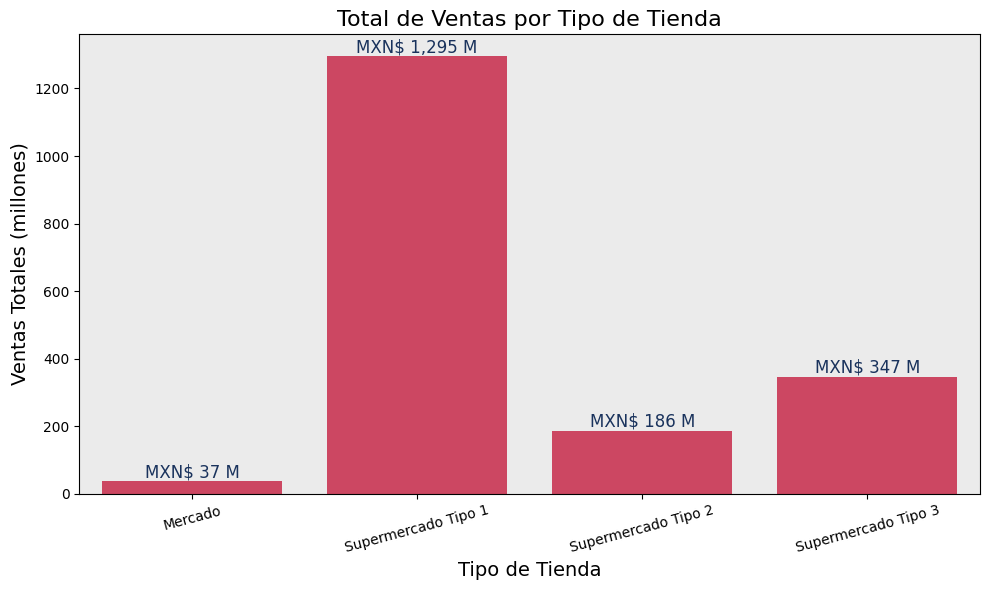

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que ya tienes tu DataFrame df

# Agrupar las ventas totales por tipo de tienda
ventas_por_tipo = df.groupby('tienda_tienda_tipo')['ventas_totales'].sum().reset_index()

# Convertir las ventas totales a millones
ventas_por_tipo['ventas_totales_millones'] = ventas_por_tipo['ventas_totales'] / 1_000_000

# Configuración de la figura
plt.figure(figsize=(10, 6))
plt.gca().set_facecolor('#ebebeb')  # Color de fondo de la figura

# Crear el gráfico de barras
bar_plot = sns.barplot(data=ventas_por_tipo, x='tienda_tienda_tipo', y='ventas_totales_millones',
                       color='#e23155')

# Añadir etiquetas sobre las barras
for p in bar_plot.patches:
    bar_plot.annotate(f'MXN$ {p.get_height():,.0f} M',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom',
                      color='#19325c',
                      fontsize=12)

# Títulos y etiquetas
plt.title('Total de Ventas por Tipo de Tienda', fontsize=16)
plt.xlabel('Tipo de Tienda', fontsize=14)
plt.ylabel('Ventas Totales (millones)', fontsize=14)

# Mostrar el gráfico
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>


El DataFrame "df" contiene la columna "ventas_totales", que informa el valor en reales obtenido en ventas de productos por varias tiendas.

Además, en "df", tenemos la columna "tienda_tipo" con 4 categorías de tipo para tiendas: 'Supermercado Tipo 1', 'Supermercado Tipo 2', 'Mercado', 'Supermercado Tipo 3'.

Deseo crear una visualización que permita identificar el total obtenido en ventas para las cuatro categorías de tipo de tienda y representarlas en un gráfico de barras.

Los datos en la columna "ventas_totales" deben ser agrupados por las categorías de "tienda_tipo".

La figura de la gráfica debe seguir la identidad visual de la tienda, con el fondo de la figura y de la gráfica en color "#ebebeb" y las barras en color "#e23155".

Además, es necesario mostrar el total de las ventas en millones sobre cada columna, con el texto de esa información en color "#19325c" y la estructura "MXN$ valor M".

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.

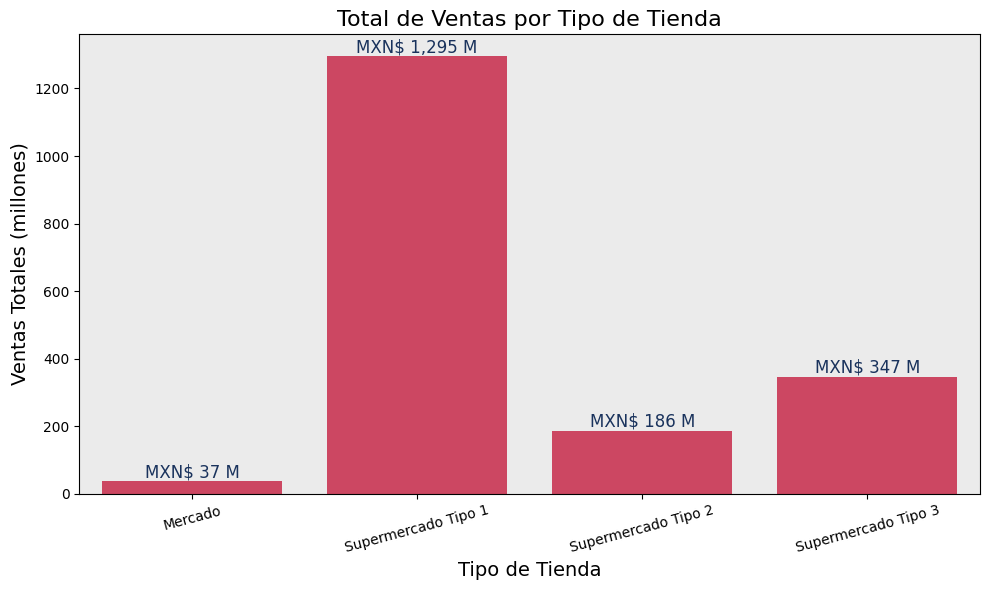

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar las ventas totales por tipo de tienda
ventas_por_tipo = df.groupby('tienda_tienda_tipo')['ventas_totales'].sum().reset_index()

# Convertir las ventas totales a millones
ventas_por_tipo['ventas_totales_millones'] = ventas_por_tipo['ventas_totales'] / 1_000_000

# Configuración de la figura
plt.figure(figsize=(10, 6))
plt.gca().set_facecolor('#ebebeb')  # Color de fondo de la figura

# Crear el gráfico de barras
bar_plot = sns.barplot(data=ventas_por_tipo, x='tienda_tienda_tipo', y='ventas_totales_millones',
                       color='#e23155')

# Añadir etiquetas sobre las barras
for p in bar_plot.patches:
    bar_plot.annotate(f'MXN$ {p.get_height():,.0f} M',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom',
                      color='#19325c',
                      fontsize=12)

# Títulos y etiquetas
plt.title('Total de Ventas por Tipo de Tienda', fontsize=16)
plt.xlabel('Tipo de Tienda', fontsize=14)
plt.ylabel('Ventas Totales (millones)', fontsize=14)

# Mostrar el gráfico
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

El DataFrame "df" contiene la columna "ventas_totales", que informa el valor en reales obtenido en ventas de productos por varias tiendas.

Además, en "df", tenemos la columna "item_tipo" con 16 categorías de productos.

Deseo crear una visualización que permita identificar el total obtenido en ventas por categorías de productos en un gráfico de barras horizontales.

Los datos en la columna "ventas_totales" deben agruparse por las categorías de "item_tipo".

La figura de la representación debe seguir la identidad visual de la tienda, con el fondo de la figura y del gráfico en el color "#ebebeb".

Las barras deben estar en el color "#e23155".

Los valores de las barras deben estar ordenados para mantener un aspecto de embudo.

Además, es necesario mostrar el total de las ventas en millones dentro o al lado de cada barra, con el texto de esa información en el color "#19325c" y en la estructura "MXN$ valor M".

No muestres la cuadrícula en el gráfico.

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8550 entries, 0 to 8549
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   index                              8550 non-null   int64  
 1   item_identificador                 8550 non-null   object 
 2   tienda_identificador               8550 non-null   object 
 3   ventas_totales                     8550 non-null   float64
 4   item_item_peso                     8550 non-null   float64
 5   item_item_contenido_grasa          8550 non-null   object 
 6   item_item_visibilidad              8550 non-null   float64
 7   item_item_tipo                     8550 non-null   object 
 8   item_item_precio                   8550 non-null   float64
 9   tienda_tienda_ano_establecimiento  8550 non-null   int64  
 10  tienda_tienda_tamano               8550 non-null   object 
 11  tienda_tienda_tipo_ubicacion       8550 non-null   objec

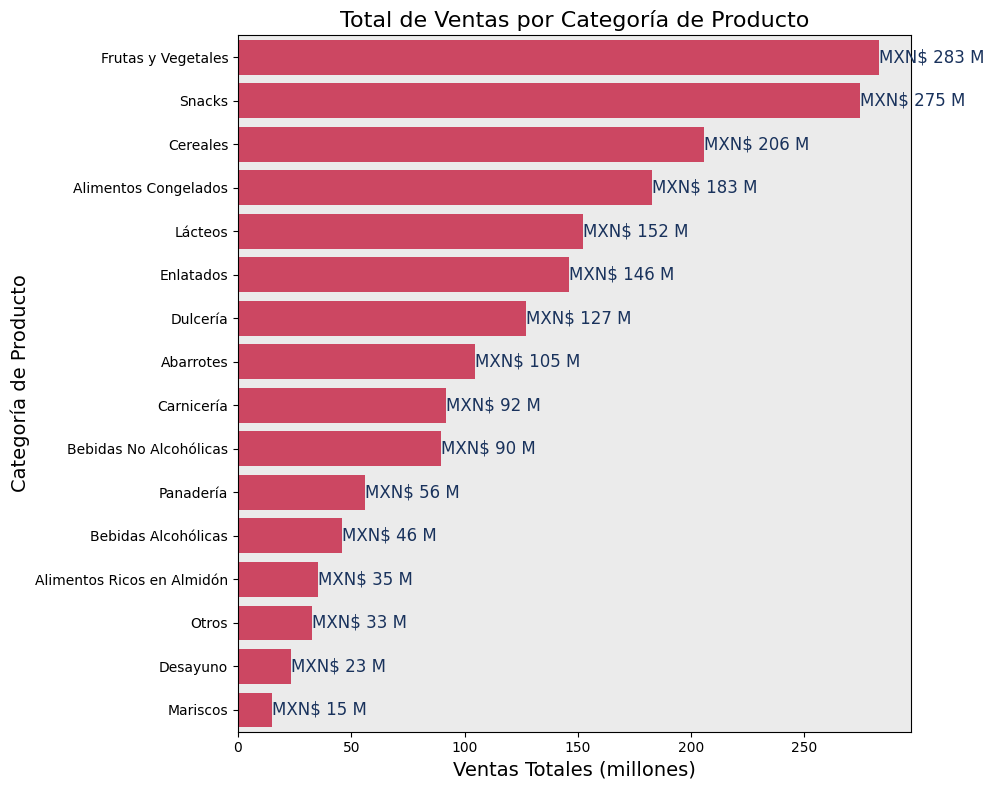

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar las ventas totales por tipo de item
ventas_por_tipo = df.groupby('item_item_tipo')['ventas_totales'].sum().reset_index()

# Convertir las ventas totales a millones
ventas_por_tipo['ventas_totales_millones'] = ventas_por_tipo['ventas_totales'] / 1_000_000

# Ordenar los datos para mantener un aspecto de embudo
ventas_por_tipo = ventas_por_tipo.sort_values(by='ventas_totales_millones', ascending=False)

# Configuración de la figura
plt.figure(figsize=(10, 8))
plt.gca().set_facecolor('#ebebeb')  # Color de fondo de la figura

# Crear el gráfico de barras horizontales
bar_plot = sns.barplot(data=ventas_por_tipo, y='item_item_tipo', x='ventas_totales_millones',
                       color='#e23155')

# Añadir etiquetas sobre las barras
for p in bar_plot.patches:
    bar_plot.annotate(f'MXN$ {p.get_width():,.0f} M',
                      (p.get_width(), p.get_y() + p.get_height() / 2),
                      ha='left', va='center',
                      color='#19325c',
                      fontsize=12)

# Títulos y etiquetas
plt.title('Total de Ventas por Categoría de Producto', fontsize=16)
plt.xlabel('Ventas Totales (millones)', fontsize=14)
plt.ylabel('Categoría de Producto', fontsize=14)

# Desactivar la cuadrícula
plt.grid(False)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

El DataFrame "df" contiene la columna "ventas_totales", que informa el valor en pesos mexicanos obtenido en ventas de productos por varias tiendas.

Además, en "df", tenemos la columna "item_contenido_grasa" con 2 categorías: 'Bajo Contenido de Grasa' y 'Regular'.

Deseo crear una visualización que permita identificar el total obtenido en ventas para las 2 categorías de cantidad de grasa en un gráfico de columnas.

Los datos en la columna "ventas_totales" deben agruparse por las categorías de "item_contenido_grasa".

La figura de la representación debe seguir la identidad visual de la tienda, con el fondo de la figura y del gráfico en el color "#ebebeb".

Las columnas de cada categoría deben tener colores específicos: la categoría 'Bajo Contenido de Grasa' en el color "#e23155" y la categoría 'Regular' en el color "#acdcd3".

Además, es necesario mostrar el total de las ventas en millones encima de cada columna, con el texto de esa información en el color "#19325c" y en la estructura "MXN$ valor M".

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8550 entries, 0 to 8549
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   index                              8550 non-null   int64  
 1   item_identificador                 8550 non-null   object 
 2   tienda_identificador               8550 non-null   object 
 3   ventas_totales                     8550 non-null   float64
 4   item_item_peso                     8550 non-null   float64
 5   item_item_contenido_grasa          8550 non-null   object 
 6   item_item_visibilidad              8550 non-null   float64
 7   item_item_tipo                     8550 non-null   object 
 8   item_item_precio                   8550 non-null   float64
 9   tienda_tienda_ano_establecimiento  8550 non-null   int64  
 10  tienda_tienda_tamano               8550 non-null   object 
 11  tienda_tienda_tipo_ubicacion       8550 non-null   objec

<ipython-input-115-cfb820e5a4e9>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=ventas_por_grasa, x='item_item_contenido_grasa', y='ventas_totales_millones', palette=colors)


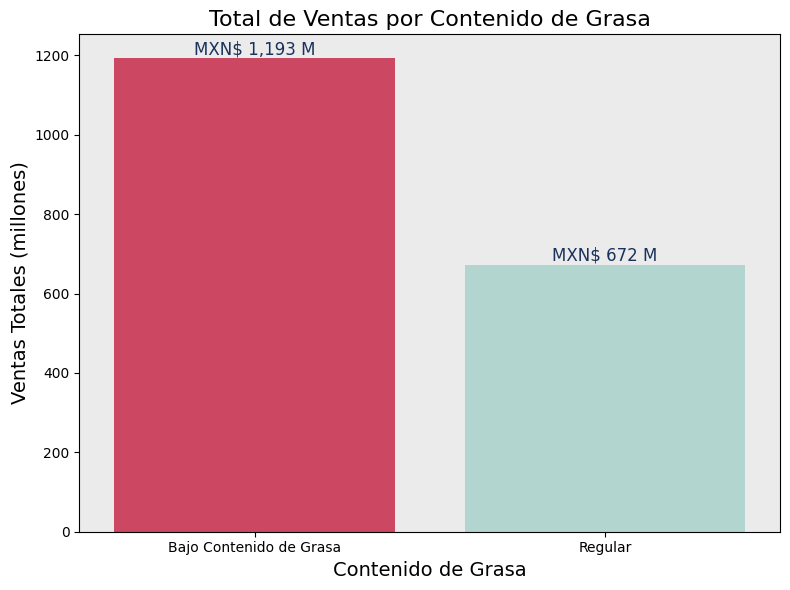

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar las ventas totales por tipo de contenido de grasa
ventas_por_grasa = df.groupby('item_item_contenido_grasa')['ventas_totales'].sum().reset_index()

# Convertir las ventas totales a millones
ventas_por_grasa['ventas_totales_millones'] = ventas_por_grasa['ventas_totales'] / 1_000_000

# Configuración de la figura
plt.figure(figsize=(8, 6))
plt.gca().set_facecolor('#ebebeb')  # Color de fondo de la figura

# Crear el gráfico de columnas
colors = ['#e23155' if x == 'Bajo Contenido de Grasa' else '#acdcd3' for x in ventas_por_grasa['item_item_contenido_grasa']]
bar_plot = sns.barplot(data=ventas_por_grasa, x='item_item_contenido_grasa', y='ventas_totales_millones', palette=colors)

# Añadir etiquetas sobre las columnas
for p in bar_plot.patches:
    bar_plot.annotate(f'MXN$ {p.get_height():,.0f} M',
                      (p.get_x() + p.get_width() / 2, p.get_height()),
                      ha='center', va='bottom',
                      color='#19325c',
                      fontsize=12)

# Títulos y etiquetas
plt.title('Total de Ventas por Contenido de Grasa', fontsize=16)
plt.xlabel('Contenido de Grasa', fontsize=14)
plt.ylabel('Ventas Totales (millones)', fontsize=14)

# Desactivar la cuadrícula
plt.grid(False)

# Mostrar el gráfico
plt.tight_layout()
plt.show()